## <span style="color:#0b486b">Convolutional Neural Networks and Image Classification</span>

### Developer: Mayana Mohsin Khan


**The dataset we use for this part is a small animal dataset consisting of $2000$ images of cats, dogs, fishes and lions, each of which has 500 images. You can download the dataset at [download here](https://drive.google.com/file/d/1t5b-pNMK5-uIK6wZIIHBluLY7tPK0JzV/view?usp=sharing) and then decompress to the folder the folder `datasets\Animals` for you in the assignment folder.**

**Our task is to build a CNN model using *TF 2.x* to classify these animals.**

1. `AnimalsDatasetManager`: Support with loading and spliting the dataset into the train-val-test sets. It also help generate next batches for training. `AnimalsDatasetManager` will be passed to CNN model for training and testing.
2. `DefaultModel`: A base class for the CNN model.
3. `YourModel`: The class you'll need to implement to build the CNN model. It inherits some useful attributes and functions from the base class `DefaultModel`

Run the following cells to load and preprocess the Animal dataset.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import models
from models import SimplePreprocessor, AnimalsDatasetManager, DefaultModel

In [3]:
def create_label_folder_dict(adir):
    sub_folders= [folder for folder in os.listdir(adir)
                  if os.path.isdir(os.path.join(adir, folder))]
    label_folder_dict= dict()
    for folder in sub_folders:
        item= {folder: os.path.abspath(os.path.join(adir, folder))}
        label_folder_dict.update(item)
    return label_folder_dict

In [4]:
label_folder_dict= create_label_folder_dict("./datasets/Animals")

The below code helps to create a data manager that contains all relevant methods used to manage and process our experimental data. 

In [5]:
sp = SimplePreprocessor(width=32, height=32)
data_manager = AnimalsDatasetManager([sp])
data_manager.load(label_folder_dict, verbose=100)
data_manager.process_data_label()
data_manager.train_valid_test_split()

dogs 12500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
fishes 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
lions 500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500
cats 12500
Processed 100/500
Processed 200/500
Processed 300/500
Processed 400/500
Processed 500/500


Note that the object `data_manager` has the attributes relating to *the training, validation, and testing sets* as shown belows. You can use them in training your developped models in the sequel.

In [6]:
print(data_manager.X_train.shape, data_manager.y_train.shape)
print(data_manager.X_valid.shape, data_manager.y_valid.shape)
print(data_manager.X_test.shape, data_manager.y_test.shape)
print(data_manager.classes)

(1600, 32, 32, 3) (1600,)
(200, 32, 32, 3) (200,)
(200, 32, 32, 3) (200,)
['cats' 'dogs' 'fishes' 'lions']


### Defualt Model
We now run the **default model** built in the **models.py** file which serves as a basic baseline to start the investigation. Follow the following steps to realize how to run a model and know the built-in methods associated to a model developped in the DefaultModel class.

We first initialize a default model from the DefaultModel class. Basically, we can define the relevant parameters of training a model including `num_classes`, `optimizer`, `learning_rate`, `batch_size`, and `num_epochs`.

In [57]:
network1 = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate=0.5)

The method `build_cnn()` assists us in building your convolutional neural network. You can view the code (in the **models.py** file) of the model behind a default model to realize how simple it is. Additionally, the method `summary()` shows the architecture of a model.

In [58]:
network1.build_cnn()
network1.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_136 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
average_pooling2d_68 (Averag (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_138 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_69 (Averag (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 4096)            

To train a model regarding to the datasets stored in `data_manager`, you can invoke the method `fit()` for which you can specify the batch size and number of epochs for your training. 

In [59]:
network1.fit(data_manager, batch_size = 64, num_epochs = 20)

Train on 1600 samples, validate on 200 samples
Epoch 1/20
1600/1600 [==============================] - 1s 561us/sample - loss: 1.4433 - acc: 0.2800 - val_loss: 1.3714 - val_acc: 0.3050
Epoch 2/20
1600/1600 [==============================] - 0s 124us/sample - loss: 1.3924 - acc: 0.2475 - val_loss: 1.3849 - val_acc: 0.3450
Epoch 3/20
1600/1600 [==============================] - 0s 116us/sample - loss: 1.3837 - acc: 0.2725 - val_loss: 1.3625 - val_acc: 0.3550
Epoch 4/20
1600/1600 [==============================] - 0s 105us/sample - loss: 1.3928 - acc: 0.2769 - val_loss: 1.3872 - val_acc: 0.2550
Epoch 5/20
1600/1600 [==============================] - 0s 106us/sample - loss: 1.3887 - acc: 0.2281 - val_loss: 1.3858 - val_acc: 0.2700
Epoch 6/20
1600/1600 [==============================] - 0s 104us/sample - loss: 1.3869 - acc: 0.2512 - val_loss: 1.3735 - val_acc: 0.3600
Epoch 7/20
1600/1600 [==============================] - 0s 101us/sample - loss: 1.4188 - acc: 0.2925 - val_loss: 1.3898 - val

Here you can compute the accuracy of your trained model with respect to a separate testing set.

In [60]:
network1.compute_accuracy(data_manager.X_test, data_manager.y_test)

0.3

Below shows how you can inspect the training progress.

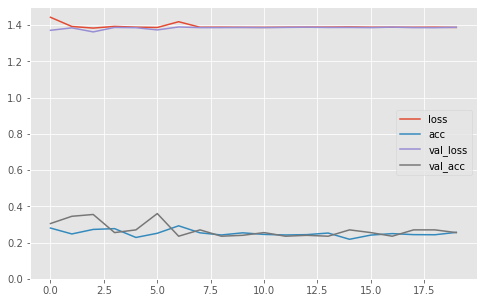

In [61]:
network1.plot_progress()

You can use the method `predict()` to predict labels for data examples in a test set.

In [62]:
network1.predict(data_manager.X_test[0:10])

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

Finally, the method `plot_prediction()` visualizes the predictions for a test set in which several images are chosen to show the predictions.

<Figure size 432x288 with 0 Axes>

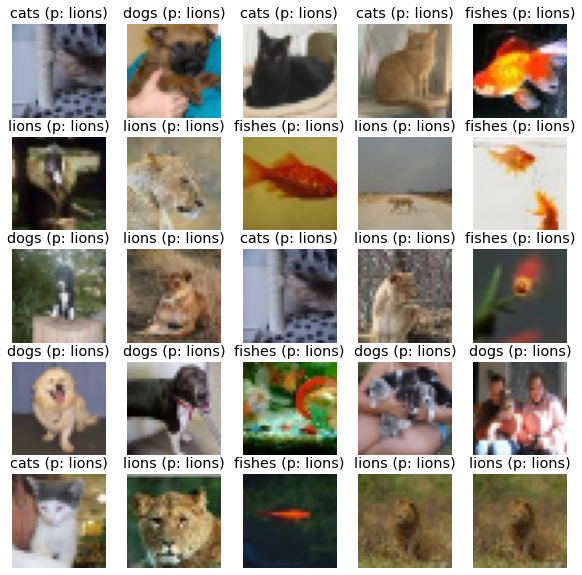

In [63]:
network1.plot_prediction(data_manager.X_test, data_manager.y_test, data_manager.classes)

<span style="color:#0b486b"> *Model Observations* </span>

By running the above cells, I made the following observations:
1. The defualt mode has less parameters to train on leading to a potential overfitting problem.
2. The testing accuracy is quite low which further states the model is clearly a overfitting the traing set and underfitting the testing set.
3. The netword does not predict the animal correctly on testing set, solidifying my claim that the model has clearly not learned properly on training data as it needs more prameters and perhaps a different learning rates.
4. The batch size of the model is quite high at 128 images per batch, should be a little less, around 32 or so to impove the base model.

## Hyperparameter Tunining the Default Model
**Normally the first parameter to tune in Deep Learning is learning rate. So, lets try running the default model with different learning rates (recommended in the list $[0.0001, 0.001, 0.005, 0.01]$) by entering the value in the cell below and run it. You should write your own code below for this learning rate tuning. Note that you can set the attribute `verbose` of the `DefaultModel` class to `False` for keeping the training silently without showing its details.**

In [64]:
#code for tuning here
learning_rate = [0.0001,0.001,0.005,0.01,0.05,0.1] 
network_models = {}
for lr in learning_rate:
  print("Learning rate:", lr)
  network1 = DefaultModel(name='network1',
                       num_classes=len(data_manager.classes),
                       optimizer='sgd',
                       batch_size= 128,
                       num_epochs = 20,
                       learning_rate=lr)
  network1.build_cnn()
  network1.fit(data_manager, batch_size = 64, num_epochs = 20)
  print('-'* 100)
  network_models[lr] = network1

Learning rate: 0.0001
Train on 1600 samples, validate on 200 samples
Epoch 1/20
1600/1600 [==============================] - 1s 553us/sample - loss: 1.3899 - acc: 0.2488 - val_loss: 1.3894 - val_acc: 0.2350
Epoch 2/20
1600/1600 [==============================] - 0s 117us/sample - loss: 1.3898 - acc: 0.2506 - val_loss: 1.3893 - val_acc: 0.2350
Epoch 3/20
1600/1600 [==============================] - 0s 113us/sample - loss: 1.3897 - acc: 0.2506 - val_loss: 1.3892 - val_acc: 0.2350
Epoch 4/20
1600/1600 [==============================] - 0s 112us/sample - loss: 1.3896 - acc: 0.2519 - val_loss: 1.3891 - val_acc: 0.2350
Epoch 5/20
1600/1600 [==============================] - 0s 106us/sample - loss: 1.3895 - acc: 0.2525 - val_loss: 1.3889 - val_acc: 0.2350
Epoch 6/20
1600/1600 [==============================] - 0s 101us/sample - loss: 1.3894 - acc: 0.2531 - val_loss: 1.3888 - val_acc: 0.2350
Epoch 7/20
1600/1600 [==============================] - 0s 100us/sample - loss: 1.3894 - acc: 0.2537 - 

learning rate: 0.0001
0.25


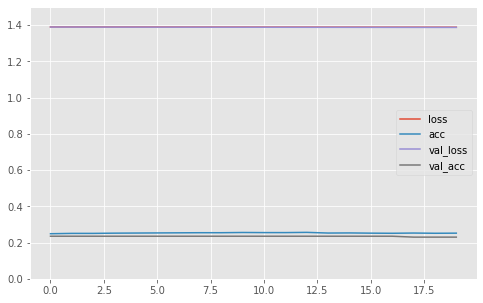

----------------------------------------------------------------------------------------------------
learning rate: 0.001
0.215


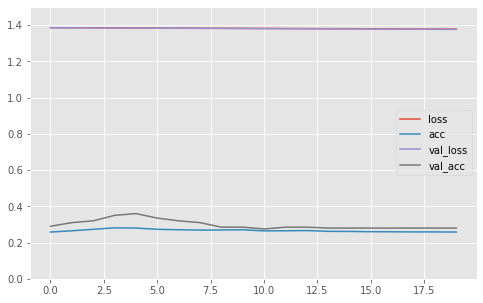

----------------------------------------------------------------------------------------------------
learning rate: 0.005
0.355


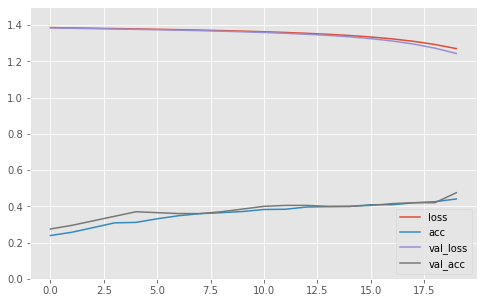

----------------------------------------------------------------------------------------------------
learning rate: 0.01
0.515


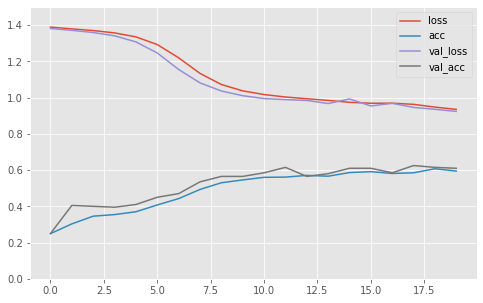

----------------------------------------------------------------------------------------------------
learning rate: 0.05
0.63


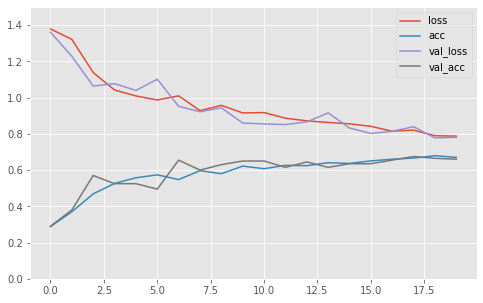

----------------------------------------------------------------------------------------------------
learning rate: 0.1
0.66


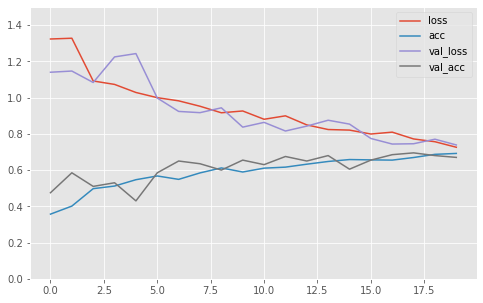

----------------------------------------------------------------------------------------------------


In [65]:
for model, network1 in network_models.items():
  print('learning rate: {}'.format(model))
  accuracy = network1.compute_accuracy(data_manager.X_test, data_manager.y_test)
  print(accuracy)
  network1.plot_progress()
  print('-' * 100)

<span style="color:#0b486b"> *observation* </span>

On hypertuning the **learning rate** between **[0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]**, I can say that the best model is the one with learning rate = 0.05. This is beacause,

1. It achieve the best model accuracy
2. The test loss for learning rate = 0.05 does not converge early as compared to the model with learning rate = 0.1 and lr =0.01 is also its more voilent in learning the parameters.
3. The models with learning rate between 0.0001 and 0.001 are very inginificant as they do not show any significance in model learning and also have bad accuracy.
4. The models with learning rate of 0.05 and 0.01 show improvements.

### Experimenting with a more complex CNN architectures:
### The goal is to be able to pass the parameters to initialize a new instance of `YourModel` to build different network architectures with different parameters.

1. `num_blocks`: an integer specifying the number of blocks in our network. Each block has the pattern `[conv, batch norm, activation, conv, batch norm, activation, mean pool, dropout]`. All convolutional layers have filter size $(3, 3)$, strides $(1, 1)$ and 'SAME' padding, and all mean pool layers have strides $(2, 2)$ and 'SAME' padding. The network will consists of a few blocks before applying a linear layer to output the logits for the softmax layer.

2. `feature_maps`: the number of feature maps in the first block of the network. The number of feature_maps will double in each of the following block. To make it convenient for you, we already calculated the number of feature maps for each block for you in line $106$
3. `drop_rate`: the keep probability for dropout. Setting `drop_rate` to $0.0$ means not using dropout. 
4. `batch_norm`: the batch normalization function is used or not. Setting `batch_norm` to `None` means not using batch normalization. 

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

**Defining a new neaural Architecture with `YourModel` class here. Note that this class will inherit from the `DefaultModel` class.**

In [67]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001,
                 verbose= True):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, optimizer, batch_size, num_epochs, learning_rate, verbose)
    
    def build_cnn(self):
        #Insert your code here
        self.model = models.Sequential()
        self.model.add(layers.InputLayer(input_shape=(self.width, self.height, self.depth)))
        for i in range(self.num_blocks): 
          for j in range(2):
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding='same'))
            if(self.batch_norm == True):
              self.model.add(layers.BatchNormalization(momentum=0.9))
            self.model.add(layers.Activation(self.activation_func))
          self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding="same"))
          self.model.add(layers.Dropout(self.drop_rate))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(self.num_classes, activation='softmax'))
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


**Lets Experiment with experiment with `dropout` or `batch normalization`.**

**Here, lets finetune the `drop_rate` rates and the observe the `validation accuracy` for each rate (recomended range: 0.2 to 0.5).


<span style="color:#0b486b"> #*Write your answer and observation here* </span>

By hyper tuing the drop_rate between 0.2 and 0.5, the model was evaluated on validation data and the following observations are made.

1. `drop_rate = 0.2`: The value is quite simple for the model but its almost rivals that of 0.4 and 0.5, So it could be considered given it simplicity and ablility to reduce overfitting.
2. `drop_rate = 0.3`: The most prefered vale as it increases the accuracy on validation data and reducres overfitting
3. `drop_rate = 0.4`: The model preforms better then base mode but is a little bit complex and less accurate therby could be a lit overfitting compared to `drop_rate = 0.3`.
4. `drop_rate = 0.5`: The model is too complex and gives no advantage of choosing it over `drop_rate = 0.3`, given its comprehensiveness actually overfits the data.

I made the observations based on the following cell to hyper-tune the parameters:



### Using Dropout layer ans set batch normalization to None

In [78]:
drop_rates = np.arange(0.2, 0.6, 0.1)
network_drop_rate_list = []
for drop_rate in drop_rates:
  network_models_dropout = {}
  drop_out_network_tuning = YourModel(name='network1',
                    feature_maps=32,
                    num_classes=len(data_manager.classes),
                    num_blocks=4,
                    drop_rate= round(drop_rate,2), # enter your final dropout rate value here
                    batch_norm=None,     
                    optimizer='adam',
                    learning_rate= 0.001)
  drop_out_network_tuning.build_cnn()
  drop_out_network_tuning.fit(data_manager, batch_size = 64, num_epochs = 20)
  valid_accuracy = drop_out_network_tuning.compute_accuracy(data_manager.X_valid, data_manager.y_valid)
  network_models_dropout['drop_rate'] = round(drop_rate,2)
  network_models_dropout['valid_accuracy'] = valid_accuracy
  network_drop_rate_list.append(network_models_dropout)
network_drop_rate_list

Train on 1600 samples, validate on 200 samples
Epoch 1/20
1600/1600 [==============================] - 2s 1ms/sample - loss: 1.2514 - acc: 0.3613 - val_loss: 1.0890 - val_acc: 0.4450
Epoch 2/20
1600/1600 [==============================] - 0s 230us/sample - loss: 1.0275 - acc: 0.4925 - val_loss: 0.9217 - val_acc: 0.6200
Epoch 3/20
1600/1600 [==============================] - 0s 175us/sample - loss: 0.9549 - acc: 0.5619 - val_loss: 0.8589 - val_acc: 0.6250
Epoch 4/20
1600/1600 [==============================] - 0s 164us/sample - loss: 0.8948 - acc: 0.5738 - val_loss: 0.8616 - val_acc: 0.6500
Epoch 5/20
1600/1600 [==============================] - 0s 168us/sample - loss: 0.8455 - acc: 0.6125 - val_loss: 0.7792 - val_acc: 0.6500
Epoch 6/20
1600/1600 [==============================] - 0s 168us/sample - loss: 0.7862 - acc: 0.6313 - val_loss: 0.6969 - val_acc: 0.6700
Epoch 7/20
1600/1600 [==============================] - 0s 162us/sample - loss: 0.7903 - acc: 0.6375 - val_loss: 0.7285 - val_a

[{'drop_rate': 0.2, 'valid_accuracy': 0.705},
 {'drop_rate': 0.3, 'valid_accuracy': 0.735},
 {'drop_rate': 0.4, 'valid_accuracy': 0.71},
 {'drop_rate': 0.5, 'valid_accuracy': 0.655}]

using the best model i.e `drop_rate = 0.3` i created the following model

In [80]:
drop_rate = 0.3
drop_out_network = YourModel(name='network1',
                    feature_maps=32,
                    num_classes=len(data_manager.classes),
                    num_blocks=4,
                    drop_rate= drop_rate, # enter your final dropout rate value here
                    batch_norm=None,     
                    optimizer='adam',
                    learning_rate= 0.001)
drop_out_network.build_cnn()
drop_out_network.summary()
drop_out_network.fit(data_manager, batch_size = 64, num_epochs = 20)
drop_out_network.compute_accuracy(data_manager.X_valid, data_manager.y_valid)

Model: "sequential_119"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_388 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
activation_308 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_389 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_309 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
average_pooling2d_194 (Avera (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_154 (Dropout)        (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_390 (Conv2D)          (None, 16, 16, 64)     

0.745

The Model has an final accuracy of 0.745.

### Now lets use Batch Normalization



By adding a `Batch Normalization Layer`, the model preforms bettwer on both testing and validation compared to the model with just dropout layers. 

.....

In [77]:
batch_norm_network = YourModel(name='network4',
                      feature_maps=32,
                      num_classes=len(data_manager.classes),
                      num_blocks=4,
                      drop_rate= 0, 
                      batch_norm=True, #do batch norm    
                      optimizer='adam',
                      learning_rate= 0.001)
batch_norm_network.build_cnn()
batch_norm_network.summary()
batch_norm_network.fit(data_manager, batch_size = 64, num_epochs = 20)
batch_norm_network.compute_accuracy(data_manager.X_valid, data_manager.y_valid)
batch_norm_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

Model: "sequential_107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_340 (Conv2D)          (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_260 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_341 (Conv2D)          (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
activation_261 (Activation)  (None, 32, 32, 32)        0         
_________________________________________________________________
average_pooling2d_170 (Avera (None, 16, 16, 32)     

0.775

With using Batch normalization, i was able to increase the model accuracy to 0.77 for 0.745 from the drop out layer.

### HyperParameter Tuning and finding the best model:
Lets try to tune the parameters of our model [`num_blocks`, `feature_maps`, `optimizer`, `learning_rate`, `batch_size`, `keep_prob`, `batch_norm`] and create the best model

In my tests, I hypertuned the parameters with the following values.

- `feature_maps`: [16,32,64]
- `num_blocks`: [2,3,4,5,6]
- `drop_rate`: [0,0.1,0.2,0.3,0.4,0.5]
- `batch_norm`: [True, None]
- `optimizer`: ['adam','SGD', 'nadam', 'adagrad', 'rmsprop', 'adadelta']
- `learning_rate`: [0.0001,0.001,0.005,0.01,0.05,0.1]
- `batch_size`: [32,64,128,256]

From observing the hypertuned models, I made the following observations.
1. `feature_maps`: By reducing the features maps to 16, it made the model more simple and there was really no need to have a complex feature map of larger size as it did not affect the accuracy much.
2. `num_blocks`: The most optimal value for the model architecture was found to be the 3. It had a good balance between a too simple model with 2 blocks and more complex models like 4 and 5. But the accuracy of testing and validation were not really that significantly different. The model with 6 block threw an AssertionError and so could not comment about it.
3. `drop_rate`: was kept at 0 as, it was the most convient option to get higher accuracy as the Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting.
4. `optimizer`: After tying out various optimizers given in models.py, adams optimizer is the better one. At some tests `SGD` and `nadams` also preformed well but they could not be reproduced while adams was consistent.
5. `learning_rate`: The learning rate was kept at a `0.0005` which I found was the sweet spot for training, validation and testing accuracies.
6. `batch_size`: I could not preform more test given my computer limitations, but keeps `32` as the batch size in my case gave the rests i was expecting.

I developed the following models on the selected parameters.

......

In [84]:
hypertuned_network = YourModel(name='network_hypertuned',
                      feature_maps=16,
                      num_classes=len(data_manager.classes),
                      num_blocks=3,
                      drop_rate= 0, 
                      batch_norm=True, #do batch norm    
                      optimizer='adam',
                      learning_rate= 0.0005)
hypertuned_network.build_cnn()
hypertuned_network.summary()
hypertuned_network.fit(data_manager, batch_size = 32, num_epochs = 20)
hypertuned_network.compute_accuracy(data_manager.X_valid, data_manager.y_valid)
hypertuned_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

Model: "sequential_127"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_414 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_46 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
activation_334 (Activation)  (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_415 (Conv2D)          (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_47 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
activation_335 (Activation)  (None, 32, 32, 16)        0         
_________________________________________________________________
average_pooling2d_207 (Avera (None, 16, 16, 16)     

0.785

### Data Augumentation to Improve Preformance
**Now try to apply data augmentation to improve the performance. Lets extend the code of the class `YourModel` so that if the attribute `is_augmentation` is set to `True`, we apply the data augmentation.**

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [77]:
class YourModel(DefaultModel):
    def __init__(self,
                 name='network1',
                 width=32, height=32, depth=3,
                 num_blocks=2,
                 feature_maps=32,
                 num_classes=4, 
                 drop_rate=0.2,
                 batch_norm = None,
                 is_augmentation = False,
                 activation_func='relu',
                 optimizer='adam',
                 batch_size=10,
                 num_epochs= 20,
                 learning_rate=0.0001):
        super(YourModel, self).__init__(name, width, height, depth, num_blocks, feature_maps, num_classes, drop_rate, batch_norm, is_augmentation, 
                                        activation_func, optimizer, batch_size, num_epochs, learning_rate)
    
    def build_cnn(self):
        #reuse code of previous section here
        self.model = models.Sequential()
        self.model.add(layers.InputLayer(input_shape=(self.width, self.height, self.depth)))
        for i in range(self.num_blocks): 
          for j in range(2):
            self.model.add(layers.Conv2D(self.feature_maps[i], (3,3), padding='same'))
            if(self.batch_norm == True):
              self.model.add(layers.BatchNormalization(momentum=0.9))
            self.model.add(layers.Activation(self.activation_func))
          self.model.add(layers.AveragePooling2D(pool_size=(2, 2), padding="same"))
          self.model.add(layers.Dropout(self.drop_rate))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(self.num_classes, activation='softmax'))
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    def fit(self, data_manager, batch_size=None, num_epochs=None):
        #insert your code here
        batch_size = self.batch_size if batch_size is None else batch_size
        num_epochs = self.num_epochs if num_epochs is None else num_epochs
        self.model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        if (self.is_augmentation):
          aug = ImageDataGenerator(rotation_range=5, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode="nearest")
          self.history = self.model.fit_generator(aug.flow(x = data_manager.X_train, y = data_manager.y_train, batch_size=batch_size), epochs=num_epochs, validation_data= (data_manager.X_valid, data_manager.y_valid))
        else:
          self.history = self.model.fit(x = data_manager.X_train, y = data_manager.y_train, validation_data = (data_manager.X_valid, data_manager.y_valid), 
                                      epochs = num_epochs, batch_size = batch_size, verbose= self.verbose)    

**Leverage the data augmentation with the best model and lets try to observe if we can really boost the performance.**

By have the follwing parameters in Image Augmentation,
1. Randomly rotated ±5 degrees
2. Horizontally and vertically shifted by a factor of 0.2
3. Sheared by 0.1
4. Zoomed by uniformly sampling in the range [0.9, 1.1]
5. Randomly horizontally flipped

By observing the modelparameters, I found that the model preformance shifts rapidly with each running. But its more or less a spot between 72% and 78%.
Cannot really argue if the model has improved or not as it was developed based on simple parameters.

In [74]:
augmentation_network = YourModel(name='network_hypertuned',
                      feature_maps=16,
                      num_classes=len(data_manager.classes),
                      num_blocks=3,
                      drop_rate= 0, 
                      batch_norm=True, #do batch norm    
                      optimizer='adam',
                      learning_rate= 0.0005)
augmentation_network.build_cnn()
augmentation_network.summary()
augmentation_network.fit(data_manager, batch_size = 32, num_epochs = 20)
augmentation_network.compute_accuracy(data_manager.X_valid, data_manager.y_valid)
augmentation_network.compute_accuracy(data_manager.X_test, data_manager.y_test)

Model: "sequential_69"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_204 (Conv2D)          (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_204 (Bat (None, 32, 32, 16)        64        
_________________________________________________________________
activation_204 (Activation)  (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_205 (Conv2D)          (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_205 (Bat (None, 32, 32, 16)        64        
_________________________________________________________________
activation_205 (Activation)  (None, 32, 32, 16)        0         
_________________________________________________________________
average_pooling2d_102 (Avera (None, 16, 16, 16)      

0.7799999713897705

### Attack our Model
** Now that we have our best model, lets play arround a bit and attack the best obtained model with `PGD` and `FGSM` attacks with $\epsilon= 0.0313, k=20, \eta= 0.005$ on the testing set. Write the code for the attacks and report the robust accuracies. Also choose a random set of 20 clean images in the testing set and visualize the original and attacked images.**


In [41]:
# !pip install git+https://github.com/tensorflow/cleverhans.git#egg=cleverhans

In [28]:
from cleverhans.future.tf2.attacks import projected_gradient_descent, fast_gradient_method
import numpy as np

In [84]:
# Randomly sample 20 attack images
pgd_img = projected_gradient_descent(augmentation_network.model, data_manager.X_test, 0.03,  0.005, 20, np.inf)
fgsm_img = fast_gradient_method(augmentation_network.model, data_manager.X_test,0.03, np.inf)

In [85]:
print('original Model Performance :\n {}'.format(augmentation_network.compute_accuracy(data_manager.X_test, data_manager.y_test)))
print('PGD Attack Model Performance :\n {}'.format(augmentation_network.compute_accuracy(pgd_img, data_manager.y_test)))
print('FGSM Attack Model Performance : \n{}'.format(augmentation_network.compute_accuracy(fgsm_img, data_manager.y_test)))

4/4 [==============================] - 0s 3ms/step - loss: 0.7204 - accuracy: 0.7800
original Model Performance :
 0.7799999713897705
4/4 [==============================] - 0s 3ms/step - loss: 6.3665 - accuracy: 0.2450
PGD Attack Model Performance :
 0.24500000476837158
4/4 [==============================] - 0s 3ms/step - loss: 3.9656 - accuracy: 0.2850
FGSM Attack Model Performance : 
0.2849999964237213


In [80]:
## function to attack and compare with orignal image
def attack_compare_image(model, original_img, attacked_img, true_label, classes, tile_shape = (5,4)):
    oripred = model.predict(original_img)
    attpred = model.predict(attacked_img)
    plt.clf()
    fig, ax = plt.subplots(tile_shape[0], tile_shape[1]*2, figsize=(4 * tile_shape[1], 2 * tile_shape[0]))
    idx = np.random.choice(len(oripred), tile_shape[0] * tile_shape[1])

    for i in range(tile_shape[0]):
        for j in range(tile_shape[1]):
            ax[i, j*2].imshow((original_img[idx[i * tile_shape[1] + j]] + 1.0)/2)
            ax[i, j*2].set_title('Original')
            ax[i, j*2].set_xlabel('{} (p: {})'.format(classes[true_label[idx[i * tile_shape[1] + j]]],
                                                    classes[oripred[idx[i * tile_shape[1] + j]]]))
            ax[i, j*2].set_yticklabels([])
            ax[i, j*2].set_xticklabels([])
            ax[i, j*2].grid(False)

            
            ax[i, j*2+1].imshow((attacked_img[idx[i * tile_shape[1] + j]] + 1.0)/2)
            ax[i, j*2+1].set_title('Attacked')
            ax[i, j*2+1].set_xlabel('{} (p: {})'.format(classes[true_label[idx[i * tile_shape[1] + j]]],
                                            classes[attpred[idx[i * tile_shape[1] + j]]]))
            ax[i, j*2+1].set_yticklabels([])
            ax[i, j*2+1].set_xticklabels([])
            ax[i, j*2+1].grid(False)

    fig.tight_layout(w_pad=2.0)
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 432x288 with 0 Axes>

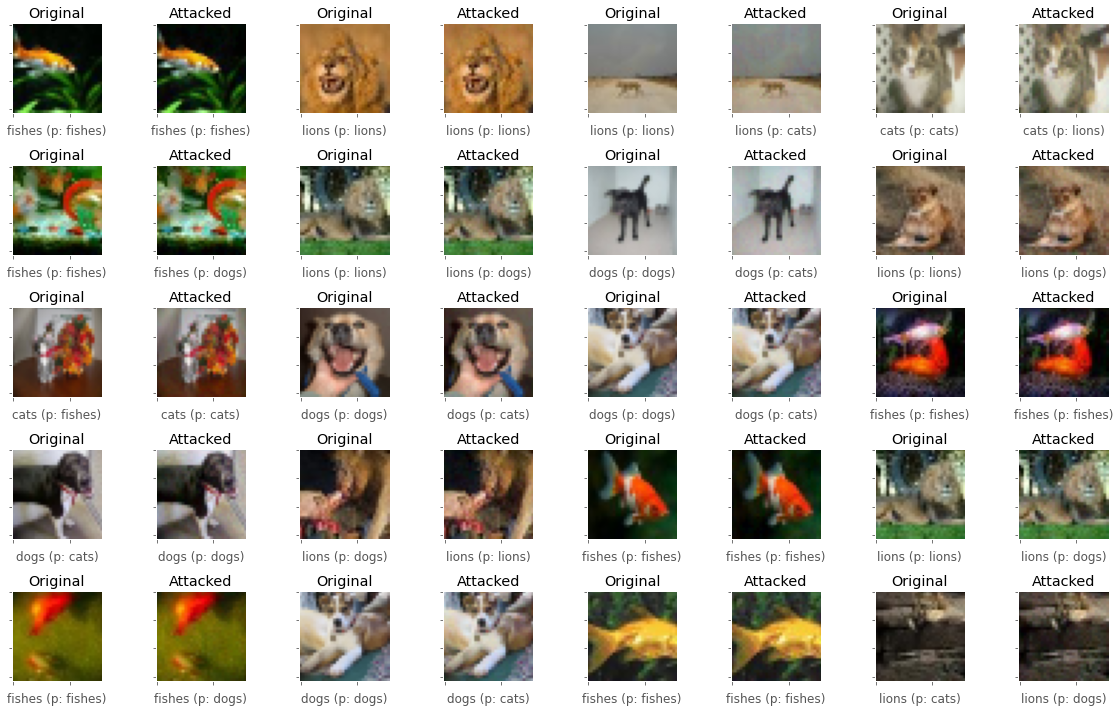

In [81]:
# Attack with PGD
attack_compare_image(augmentation_network, data_manager.X_test, pgd_img, data_manager.y_test, data_manager.classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 432x288 with 0 Axes>

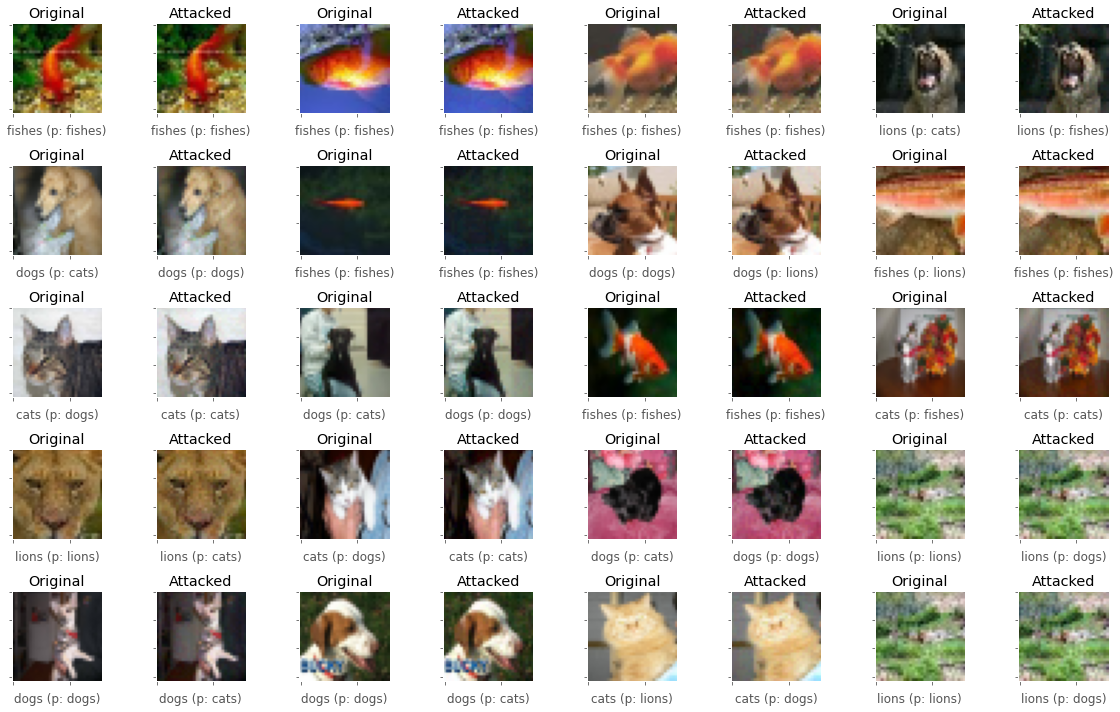

In [82]:
# Attack with FSGM
attack_compare_image(augmentation_network, data_manager.X_test,fgsm_img, data_manager.y_test, data_manager.classes)